In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib as plt

# FEC API Key
import sys
sys.path.insert(0, "/Users/Iceda/OneDrive/Desktop/ClassHomework/keys")
from config import fec_key

In [52]:
# testing getting values from the FEC api
cand_url = 'https://api.open.fec.gov/v1/presidential/contributions/by_candidate/'

# set the amount of data to be returned per page. Must be under 100
per_page = 50
election_year = '2016'

# params to pass into the url
params = {'api_key' : fec_key,
         'election_year' : election_year,
         'per_page' : per_page}

# first json request to get the number of pages to loop through
cand_search = requests.get(cand_url, params=params).json()

# stores the number of pages the search returns
page_nums = cand_search['pagination']['pages']

print(json.dumps(cand_search, indent=4))

{
    "api_version": "1.0",
    "results": [
        {
            "rounded_net_receipts": 2265.2,
            "election_year": 2020,
            "candidate_id": "P00000001",
            "candidate_last_name": "All candidates",
            "candidate_party_affiliation": null,
            "net_receipts": 2265198175.18,
            "contributor_state": "US"
        },
        {
            "rounded_net_receipts": 2035.3,
            "election_year": 2020,
            "candidate_id": "P00000002",
            "candidate_last_name": "Democrats",
            "candidate_party_affiliation": "DEM",
            "net_receipts": 2035256830.42,
            "contributor_state": "US"
        },
        {
            "rounded_net_receipts": 936.2,
            "election_year": 2020,
            "candidate_id": "P00014530",
            "candidate_last_name": "Bloomberg",
            "candidate_party_affiliation": "DEM",
            "net_receipts": 936216782.48,
            "contributor_state": "US"
    

In [53]:
# creating lists to store the data to pass to a dataframe
id_list = []
net_rec_list = []
contr_state_list = []
can_last_name = []
can_party = []

# loops through how many pages the data has returned. This is dependent on the number of results
# per page set before
for page in range(1, page_nums):
    params['page'] = page
    cand_data = requests.get(cand_url, params=params)
    cand_data = cand_data.json()
    
    # loop through however many results there will be per page and append the lists with data
    for result in range(0, per_page):
        try:
            id_list.append(cand_data['results'][result]['candidate_id'])
            net_rec_list.append(cand_data['results'][result]['rounded_net_receipts'])
            contr_state_list.append(cand_data['results'][result]['contributor_state'])
            can_last_name.append(cand_data['results'][result]['candidate_last_name'])
            can_party.append(cand_data['results'][result]['candidate_party_affiliation'])
            print("Data appended")
        except:
            print("Data out of range/not found...")

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

In [54]:
# creating the dataframe and populating it
pres_finance = pd.DataFrame({'candidate_id' : id_list,
                             'candidate_party' : can_party,
                             'candidate_last_name' : can_last_name,
                            'rounded_net_receipts' : net_rec_list,
                           'contributor_state' : contr_state_list})
pres_finance.to_csv("output/pres_finance_data.csv", index = False)
pres_finance

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,None,All candidates,2265.2,US
1,P00000002,DEM,Democrats,2035.3,US
2,P00014530,DEM,Bloomberg,936.2,US
3,P00012716,DEM,Steyer,343.1,US
4,P00000003,REP,Republicans,229.7,US
...,...,...,...,...,...
1795,P00009621,DEM,Warren,0.0,AS
1796,P00014530,DEM,Bloomberg,0.0,RI
1797,P00009423,DEM,Harris,0.0,GU
1798,P00012716,DEM,Steyer,0.0,SD


In [2]:
# load the dataframe as needed
pres_finance = pd.read_csv('output/pres_finance_data.csv')
pres_finance

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,NaN,All candidates,1462.3,US
1,P00000002,DEM,Democrats,799.4,US
2,P00000003,REP,Republicans,639.1,US
3,P00003392,DEM,Clinton,563.8,US
4,P80001571,REP,Trump,333.1,US
...,...,...,...,...,...
1645,P00003392,DEM,Clinton,0.0,KE
1646,P00000002,DEM,Democrats,0.0,BE
1647,P00000001,NaN,All candidates,0.0,BE
1648,P00003392,DEM,Clinton,0.0,BE


In [3]:
total_election = pres_finance.loc[pres_finance['contributor_state'] == 'US']
total_election

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,NaN,All candidates,1462.3,US
1,P00000002,DEM,Democrats,799.4,US
2,P00000003,REP,Republicans,639.1,US
3,P00003392,DEM,Clinton,563.8,US
4,P80001571,REP,Trump,333.1,US
5,P60007168,DEM,Sanders,228.2,US
12,P60006111,REP,Cruz,90.2,US
14,P60005915,REP,Carson,63.6,US
17,P60006723,REP,Rubio,42.1,US
19,P60008059,REP,Bush,34.1,US


In [5]:
total_dem = pres_finance.loc[pres_finance['candidate_party'] == 'DEM']
total_dem

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
1,P00000002,DEM,Democrats,799.4,US
3,P00003392,DEM,Clinton,563.8,US
5,P60007168,DEM,Sanders,228.2,US
7,P00000002,DEM,Democrats,153.9,NY
9,P00003392,DEM,Clinton,145.2,NY
...,...,...,...,...,...
1642,P00000002,DEM,Democrats,0.0,LO
1643,P00000002,DEM,Democrats,0.0,KE
1645,P00003392,DEM,Clinton,0.0,KE
1646,P00000002,DEM,Democrats,0.0,BE


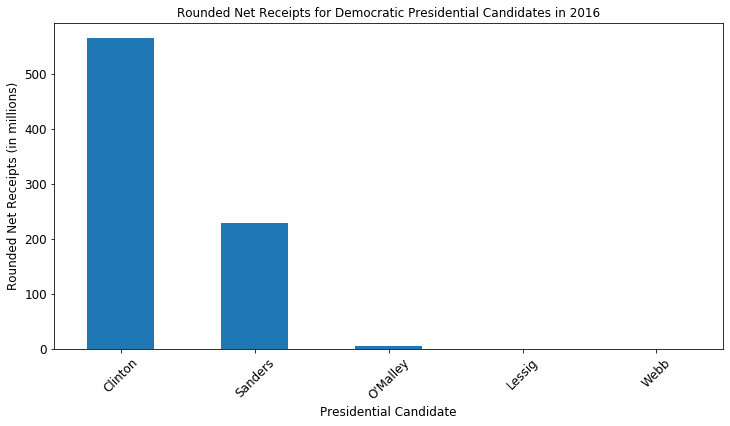

In [51]:
dem_overall = total_dem.loc[(total_dem['contributor_state'] == 'US') & 
                                (total_dem['candidate_last_name'] != 'Democrats')]
dem_overall.plot(x = 'candidate_last_name', y = 'rounded_net_receipts', kind = 'bar', figsize=(12, 6),
                  title= 'Rounded Net Receipts for Democratic Presidential Candidates in 2016',
                  legend=False, fontsize=12, rot=45)
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
plt.pyplot.xlabel("Presidential Candidate", fontsize=12)
plt.pyplot.savefig('output/dem_net_receipts.png')

In [7]:
total_repub = pres_finance.loc[pres_finance['candidate_party'] == 'REP']
total_repub

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
2,P00000003,REP,Republicans,639.1,US
4,P80001571,REP,Trump,333.1,US
12,P60006111,REP,Cruz,90.2,US
14,P60005915,REP,Carson,63.6,US
16,P00000003,REP,Republicans,49.1,TX
...,...,...,...,...,...
1604,P60006111,REP,Cruz,0.0,PU
1605,P60006723,REP,Rubio,0.0,30
1607,P00000003,REP,Republicans,0.0,PU
1609,P60006723,REP,Rubio,0.0,FR


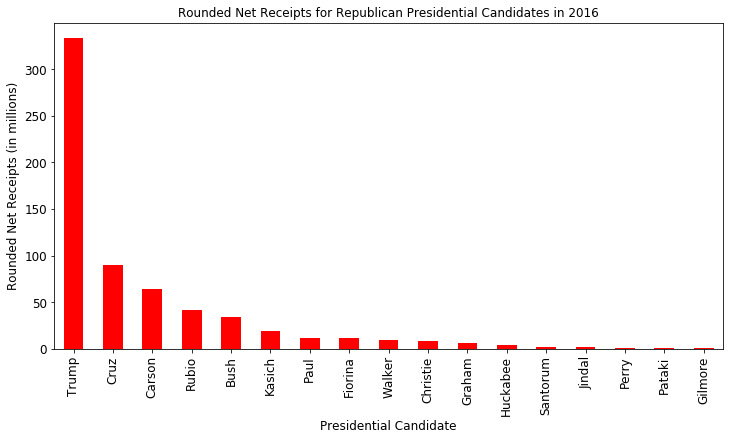

In [49]:
repub_overall = total_repub.loc[(total_repub['contributor_state'] == 'US') & 
                                (total_repub['candidate_last_name'] != 'Republicans')]
repub_overall.plot(x = 'candidate_last_name', y = 'rounded_net_receipts', kind='bar', figsize=(12, 6),
                  title= 'Rounded Net Receipts for Republican Presidential Candidates in 2016',
                  legend=False, color='Red', fontsize=12)
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
plt.pyplot.xlabel("Presidential Candidate", fontsize=12)
plt.pyplot.savefig('output/repub_net_receipts.png')

In [42]:
total_ind = pres_finance.loc[(pres_finance['candidate_party'] != 'DEM') &
                            (pres_finance['candidate_party'] != 'REP')]
total_ind = total_ind.dropna()
total_ind

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
66,P20002671,LIB,Johnson,11.6,US
70,P20003984,GRE,Stein,10.5,US
241,P60022654,IND,McMullin,1.6,US
321,P20003984,GRE,Stein,0.8,CA
396,P20002671,LIB,Johnson,0.5,CA
...,...,...,...,...,...
1506,P60022654,IND,McMullin,0.0,DE
1514,P20002671,LIB,Johnson,0.0,PW
1535,P60022654,IND,McMullin,0.0,AA
1542,P20003984,GRE,Stein,0.0,GU


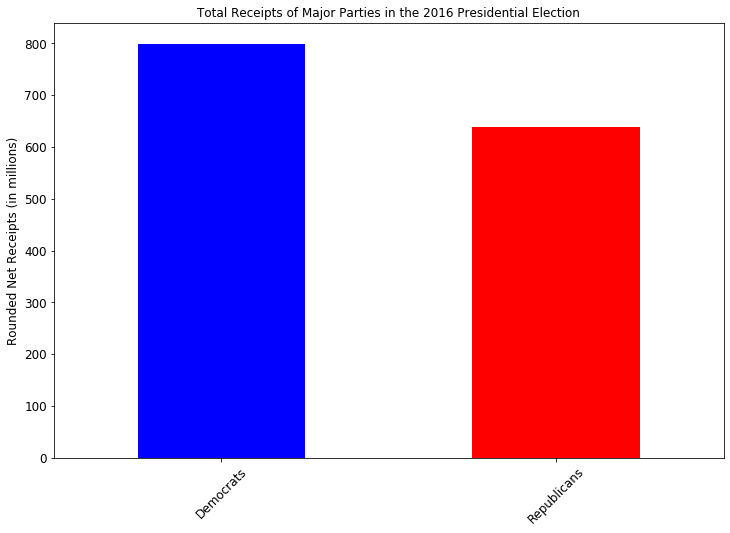

In [46]:
ax = total_election.iloc[1:3].plot(y='rounded_net_receipts', kind='bar', legend = False, rot=45, 
                                   title='Total Receipts of Major Parties in the 2016 Presidential Election',
                                  figsize = (12,8), fontsize=12, color=['Blue', 'Red'])
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
ax.set_xticklabels(['Democrats', 'Republicans'])
plt.pyplot.savefig('output/maj_party_receipts_2016.png')

# Now, Running for the 2020 Election

In [ ]:
# first json request to get the number of pages to loop through
cand_search = requests.get(cand_url, params=params).json()

# stores the number of pages the search returns
page_nums = cand_search['pagination']['pages']

print(json.dumps(cand_search, indent=4))

In [ ]:
# creating lists to store the data to pass to a dataframe
id_list = []
net_rec_list = []
contr_state_list = []
can_last_name = []
can_party = []

# loops through how many pages the data has returned. This is dependent on the number of results
# per page set before
for page in range(1, page_nums):
    params['page'] = page
    cand_data = requests.get(cand_url, params=params)
    cand_data = cand_data.json()
    
    # loop through however many results there will be per page and append the lists with data
    for result in range(0, per_page):
        try:
            id_list.append(cand_data['results'][result]['candidate_id'])
            net_rec_list.append(cand_data['results'][result]['rounded_net_receipts'])
            contr_state_list.append(cand_data['results'][result]['contributor_state'])
            can_last_name.append(cand_data['results'][result]['candidate_last_name'])
            can_party.append(cand_data['results'][result]['candidate_party_affiliation'])
            print("Data appended")
        except:
            print("Data out of range/not found...")

In [ ]:
pres_finance_current = pd.DataFrame({'candidate_id' : id_list,
                             'candidate_party' : can_party,
                             'candidate_last_name' : can_last_name,
                            'rounded_net_receipts' : net_rec_list,
                           'contributor_state' : contr_state_list})
pres_finance_current.to_csv("output/pres_finance_data_2020.csv", index = False)
pres_finance_current

In [ ]:
# load the dataframe as needed
pres_finance_current = pd.read_csv('output/pres_finance_data_2020.csv')
pres_finance_current

In [55]:
pres_finance_current

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,None,All candidates,2265.2,US
1,P00000002,DEM,Democrats,2035.3,US
2,P00014530,DEM,Bloomberg,936.2,US
3,P00012716,DEM,Steyer,343.1,US
4,P00000003,REP,Republicans,229.7,US
...,...,...,...,...,...
1795,P00009621,DEM,Warren,0.0,AS
1796,P00014530,DEM,Bloomberg,0.0,RI
1797,P00009423,DEM,Harris,0.0,GU
1798,P00012716,DEM,Steyer,0.0,SD


In [56]:
total_current_election = pres_finance_current.loc[pres_finance_current['contributor_state'] == 'US']
total_current_election

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,None,All candidates,2265.2,US
1,P00000002,DEM,Democrats,2035.3,US
2,P00014530,DEM,Bloomberg,936.2,US
3,P00012716,DEM,Steyer,343.1,US
4,P00000003,REP,Republicans,229.7,US
5,P80001571,REP,Trump,227.1,US
6,P60007168,DEM,Sanders,179.7,US
7,P00009621,DEM,Warren,120.8,US
9,P00010298,DEM,Buttigieg,99.7,US
10,P80000722,DEM,Biden,86.2,US


In [72]:
current_overall = total_current_election.loc[(total_current_election['candidate_id'] == 'P00000002') | 
                          (total_current_election['candidate_id'] == 'P00000003')]

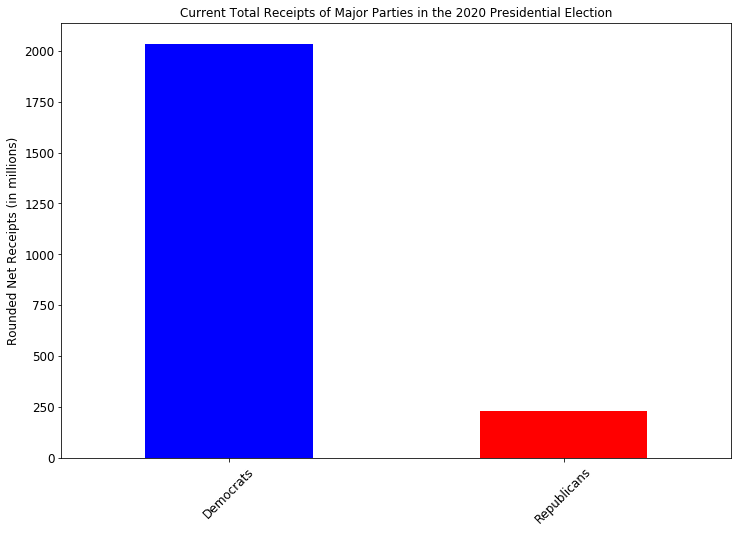

In [75]:
ax2 = current_overall.plot(y='rounded_net_receipts', kind='bar', legend = False, rot=45, 
                                   title='Current Total Receipts of Major Parties in the 2020 Presidential Election',
                                  figsize = (12,8), fontsize=12, color=['Blue', 'Red'])
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
ax2.set_xticklabels(['Democrats', 'Republicans'])
plt.pyplot.savefig('output/maj_party_receipts_2020.png')

In [76]:
current_dem = total_current_election.loc[total_current_election['candidate_party'] == 'DEM']
current_dem

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
1,P00000002,DEM,Democrats,2035.3,US
2,P00014530,DEM,Bloomberg,936.2,US
3,P00012716,DEM,Steyer,343.1,US
6,P60007168,DEM,Sanders,179.7,US
7,P00009621,DEM,Warren,120.8,US
9,P00010298,DEM,Buttigieg,99.7,US
10,P80000722,DEM,Biden,86.2,US
13,P80006117,DEM,Klobuchar,52.8,US
15,P00009423,DEM,Harris,40.0,US
16,P00006486,DEM,Yang,38.0,US


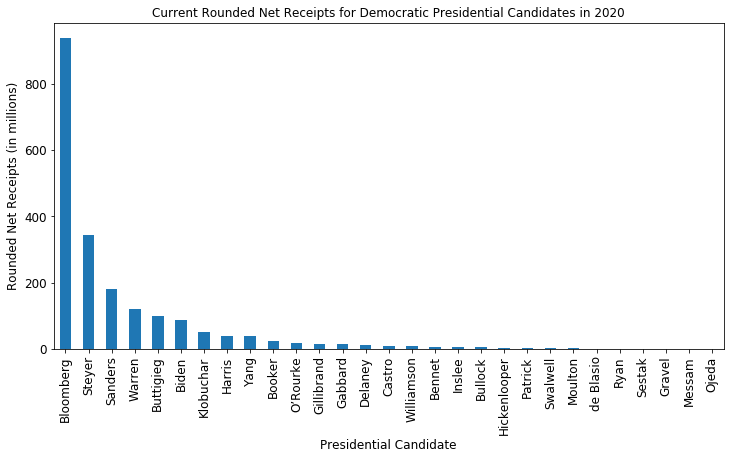

In [81]:
current_dem_overall = current_dem.loc[(current_dem['contributor_state'] == 'US') & 
                                (current_dem['candidate_last_name'] != 'Democrats')]
current_dem_overall.plot(x = 'candidate_last_name', y = 'rounded_net_receipts', kind = 'bar', figsize=(12, 6),
                  title= 'Current Rounded Net Receipts for Democratic Presidential Candidates in 2020',
                  legend=False, fontsize=12)
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
plt.pyplot.xlabel("Presidential Candidate", fontsize=12)
plt.pyplot.savefig('output/current_dem_net_receipts.png')

In [82]:
current_total_repub = total_current_election.loc[total_current_election['candidate_party'] == 'REP']
current_total_repub

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
4,P00000003,REP,Republicans,229.7,US
5,P80001571,REP,Trump,227.1,US
165,P00011239,REP,Weld,2.0,US
360,P00013276,REP,Walsh,0.5,US
610,P00013649,REP,Sanford,0.1,US


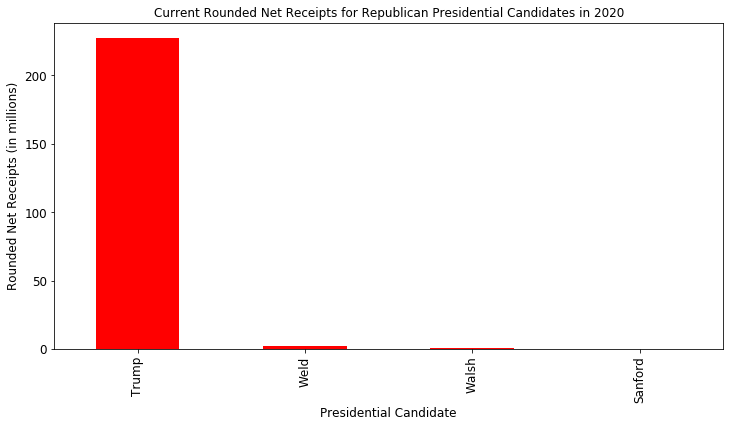

In [84]:
current_repub_overall = current_total_repub.loc[(current_total_repub['contributor_state'] == 'US') & 
                                (current_total_repub['candidate_last_name'] != 'Republicans')]
current_repub_overall.plot(x = 'candidate_last_name', y = 'rounded_net_receipts', kind='bar', figsize=(12, 6),
                  title= 'Current Rounded Net Receipts for Republican Presidential Candidates in 2020',
                  legend=False, color='Red', fontsize=12)
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
plt.pyplot.xlabel("Presidential Candidate", fontsize=12)
plt.pyplot.savefig('output/current_repub_net_receipts.png')